## Averiguando sobre los rectángulos fundamentales




In [1]:
using PyPlot
using TaylorSeries
#using IntervalArithmetic, IntervalRootFinding
using ValidatedNumerics
using StaticArrays



In [2]:
push!(LOAD_PATH,"/home/evelyn/Documentos/Tesis/Programas/IPM")

3-element Array{Any,1}:
 "/home/evelyn/julia0.6/julia-903644385b/local/share/julia/site/v0.6"
 "/home/evelyn/julia0.6/julia-903644385b/share/julia/site/v0.6"      
 "/home/evelyn/Documentos/Tesis/Programas/IPM"                       

In [3]:

using ParametrizacionMetodo

Usaremos el mapeo inverso para claular la variedad estable 

In [4]:
function Henon(x,y,a,b)
   
    x_n = a-b*y-x^2
    y_n = x 

    return [x_n,y_n]
end

Henon (generic function with 1 method)

In [5]:
function HenonI(x,y,a,b)
    
    x_n = y
    y_n = (x+y^2-a)/(-b)
    return [x_n,y_n]
end

HenonI (generic function with 1 method)

esta función calcula el punto fijo de acuerdo al parámetro del mapeo

In [6]:
function parametro(a)
    x1 = -1.+(1.+a)^.5
    x2 = -1.-(1.+a)^.5
    return [x2,x2]
end
    

parametro (generic function with 1 method)

Calculamos con un valor del parámetro 1.5 y definimos las funciones henon1 y henon2 


In [7]:
a=1.5
henon1(x,y)=Henon(x,y,a,1.)
henon2(x,y)=HenonI(x,y,a,1.)
punto1 = parametro(a)


2-element Array{Float64,1}:
 -2.58114
 -2.58114

Primero calculamos las variedades de manera directa es decir usando la función henon1

In [8]:
Orden = 250 #Funcionaba para llegar a la 6 iteración
#Orden = 80
x_fijo = [punto1[1],punto1[2]] #punto fijo
tiempo = [0.,3.] #tiempo de evaluación
delta_t = tiempo[2]/1000 #paso del tiempo de evaluación
##W_e, f_e, vec_e, val_e = Inestable(henon2,Orden,punto1,tiempo, delta_t) # variedad  estable
W_e, f_e, vec_e, val_e = Estable(henon1,Orden,punto1,tiempo, delta_t) # variedad  estable
W_i, f_i, vec_i, val_i = Inestable(henon1, Orden ,punto1, tiempo, delta_t) #variedad inestable

(TaylorSeries.Taylor1{Float64}[ - 2.58113883008419 + 0.19760964962804103 t - 0.002003895331025971 t² + 6.773617424159542e-6 t³ - 1.1146699320514831e-8 t⁴ + 1.052133282947602e-11 t⁵ - 6.3578386428285675e-15 t⁶ + 2.6472556409456974e-18 t⁷ - 7.998263760414952e-22 t⁸ + 1.8228540060561865e-25 t⁹ - 3.230947112568956e-29 t¹⁰ + 4.5653566822533906e-33 t¹¹ - 5.248531627852885e-37 t¹² + 4.993530928467195e-41 t¹³ - 3.988690026014807e-45 t¹⁴ + 2.7080200253516064e-49 t¹⁵ - 1.579446229638945e-53 t¹⁶ + 7.98795329821606e-58 t¹⁷ - 3.53204348655944e-62 t¹⁸ + 1.3759681764841008e-66 t¹⁹ - 4.747309834991615e-71 t²⁰ + 1.4588016135104067e-75 t²¹ - 3.9209475707167595e-80 t²² + 1.1965782381337765e-84 t²³ - 4.868889315322984e-89 t²⁴ + 1.6496438666451998e-109 t²⁹ + 𝒪(t³⁵¹),  - 2.58113883008419 + 0.9802807895566875 t - 0.04931280661846019 t² + 0.000826889915112779 t³ - 6.750184779658301e-6 t⁴ + 3.160694189440592e-8 t⁵ - 9.47465847482022e-11 t⁶ + 1.9570065931097607e-13 t⁷ - 2.933151342867866e-16 t⁸ + 3.316140944900

In [9]:
function evaluar(Tiempo, paso,A,B,PuntoFijo,col)
    ValX=Float64[]
    ValY=Float64[]
    push!(ValX, PuntoFijo[1]) 
    push!(ValY, PuntoFijo[2])

    for t = Tiempo[1]:paso:Tiempo[2]
        
        x = evaluate(A,t)
        y = evaluate(B,t)
        
        push!(ValX,x)
        push!(ValY,y)
        
    end
    p = plot(ValX,ValY,linestyle="None",marker =",",color=col)
    title("Espacio Fase (a=1.5)")
    legend(loc="upper right",fancybox="true")
    xlim(-10.,10.)
    ylim(-10.,10.)
    grid("on")
    return ValX,ValY
    
end

evaluar (generic function with 1 method)

Graficamos hasta un valor del parámetro 100 en dónde ya se ha formado el rectángulo fundamental

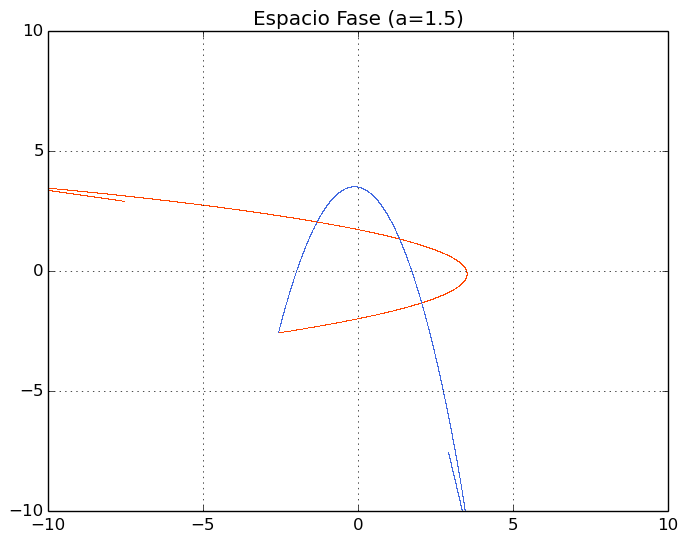

/usr/lib/pymodules/python2.7/matplotlib/axes.py:4747: UserWarning: No labeled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labeled objects found. "


([-2.58114, -2.58114, -2.5762, -2.57126, -2.56633, -2.5614, -2.55647, -2.55154, -2.54662, -2.5417  …  2.90783, 2.90684, 2.90585, 2.90487, 2.90388, 2.90289, 2.9019, 2.90091, 2.89992, 2.89893], [-2.58114, -2.58114, -2.55666, -2.53225, -2.50789, -2.4836, -2.45937, -2.4352, -2.4111, -2.38705  …  -7.59154, -7.58643, -7.58133, -7.57623, -7.57112, -7.56601, -7.5609, -7.55578, -7.55067, -7.54555])

In [10]:

figure(3)
#evaluar([0.,-100], -0.025, W_e[1],W_e[2],x_fijo,"orangered")
ite1E=evaluar([0.,100.], 0.025, W_e[1],W_e[2],x_fijo,"orangered")
ite1I=evaluar([0.,100], 0.025, W_i[1],W_i[2],x_fijo,"royalblue")

Calculamos el error asociado hasta un valor del parámetro igual a 400

In [11]:
tiem = [0.,400.]
ErrorE = CalculoError(henon1, W_e,f_e,tiem,0.025 )
ErrorI = CalculoError(henon1, W_i,f_i,tiem,0.025 )


2-element Array{Array{Float64,1},1}:
 [0.0, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.225  …  399.775, 399.8, 399.825, 399.85, 399.875, 399.9, 399.925, 399.95, 399.975, 400.0]                                                                                                                  
 [8.88178e-16, 8.95814e-16, 9.03455e-16, 9.11102e-16, 9.18754e-16, 9.26412e-16, 9.34076e-16, 9.41745e-16, 9.49419e-16, 9.571e-16  …  2.60199e-11, 2.60303e-11, 2.60408e-11, 2.60513e-11, 2.60618e-11, 2.60723e-11, 2.60828e-11, 2.60933e-11, 2.61038e-11, 2.61143e-11]

Vemos que para un valor de $t=100$ el error en la estable es menor a $10^{-8}$ mientras que en la estable el error es menor a $10^{-12}$

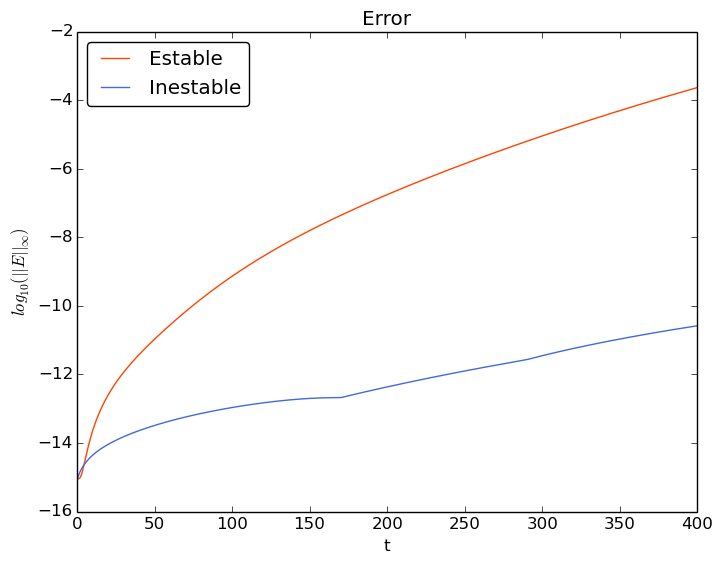

/usr/lib/pymodules/python2.7/matplotlib/legend.py:317: UserWarning: Unrecognized location "low right". Falling back on "best"; valid locations are
	right
	center left
	upper right
	lower right
	best
	center
	lower left
	center right
	upper left
	upper center
	lower center

  % (loc, '\n\t'.join(self.codes.iterkeys())))


PyObject <matplotlib.legend.Legend object at 0x7fc64ef8cb90>

In [12]:
plot(ErrorE[1],log10.(ErrorE[2]),marker= "None", label="Estable",color="orangered")
plot(ErrorI[1],log10.(ErrorI[2]),marker= "None", label="Inestable",color="royalblue")

xlabel("t")
ylabel(L"$log_{10}(|| E||_{\infty})$")
title("Error")
#grid("on")
legend(loc="low right",fancybox="true" )

Trataremos de obtener la siguiente gráfica de las variedades pero con el conjunto fundamental


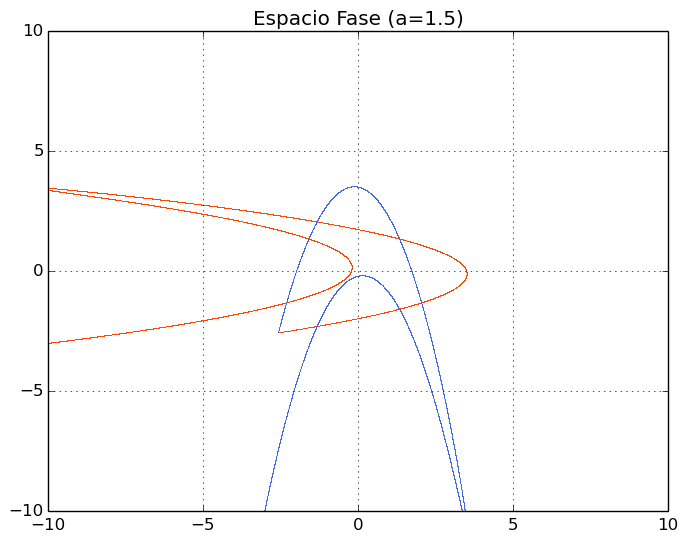

([-2.58114, -2.58114, -2.5762, -2.57126, -2.56633, -2.5614, -2.55647, -2.55154, -2.54662, -2.5417  …  -3.85213, -3.854, -3.85587, -3.85774, -3.85961, -3.86147, -3.86334, -3.86521, -3.86708, -3.86895], [-2.58114, -2.58114, -2.55666, -2.53225, -2.50789, -2.4836, -2.45937, -2.4352, -2.4111, -2.38705  …  -15.8801, -15.8948, -15.9096, -15.9243, -15.9391, -15.9538, -15.9686, -15.9834, -15.9982, -16.0129])

In [13]:
#notemos que se debe evaluar hasta 200 para llegar a tal forma
evaluar([0.,200], 0.025, W_e[1],W_e[2],x_fijo,"orangered")
evaluar([0.,200], 0.025, W_i[1],W_i[2],x_fijo,"royalblue")

En lugar de eso vamos a iterar el mapeo y evaluar hasta el mismo número en t (100)

In [14]:
#como ambas fueron calculadas con la función de hénon "normal" la aplicamos
W1_e=henon1(W_e[1],W_e[2])
W1_i=henon2(W_i[1],W_i[2])

2-element Array{TaylorSeries.Taylor1{Float64},1}:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

Graficamos las nuevas parametrizaciones en el intervalo [0,100]

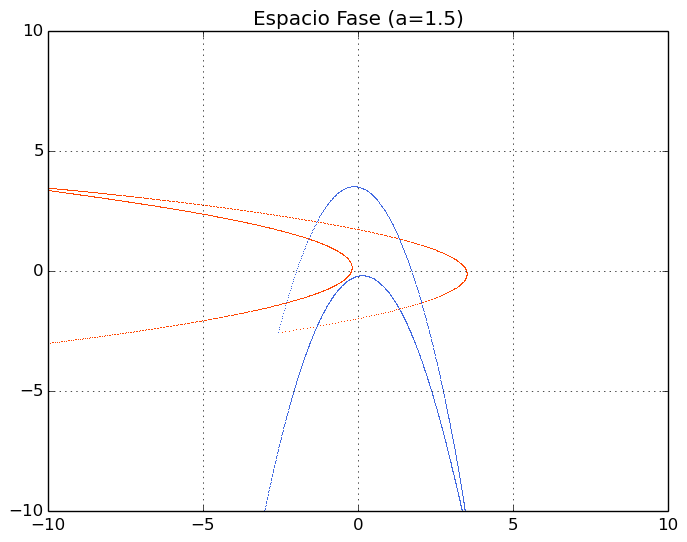

([-2.58114, -2.58114, -2.55666, -2.53225, -2.50789, -2.4836, -2.45937, -2.4352, -2.4111, -2.38705  …  -7.59154, -7.58643, -7.58133, -7.57623, -7.57112, -7.56601, -7.5609, -7.55578, -7.55067, -7.54555], [-2.58114, -2.58114, -2.46032, -2.34102, -2.22321, -2.10689, -1.99204, -1.87867, -1.76676, -1.6563  …  -59.0392, -58.9608, -58.8824, -58.8041, -58.7257, -58.6474, -58.5691, -58.4908, -58.4125, -58.3343])

In [15]:
evaluar([0.,100], 0.025, W1_e[1],W1_e[2],x_fijo,"orangered") #el valor del parámetro sigue siendo 100
evaluar([0.,100], 0.025, W1_i[1],W1_i[2],x_fijo,"royalblue")

Notamos que mientras que en la variedad estable apareció el segundo tentáculo (que es el mapeado del primero) en la variedad estable no llegamos tan lejos. De hecho llegamos menos lejos que en la variedad sin iterar con el mismo valor de $t=100$. Pero veamos que pasa si ahora uso el mapeo inverso "henon2" para iterar las variedades W_e, W_i

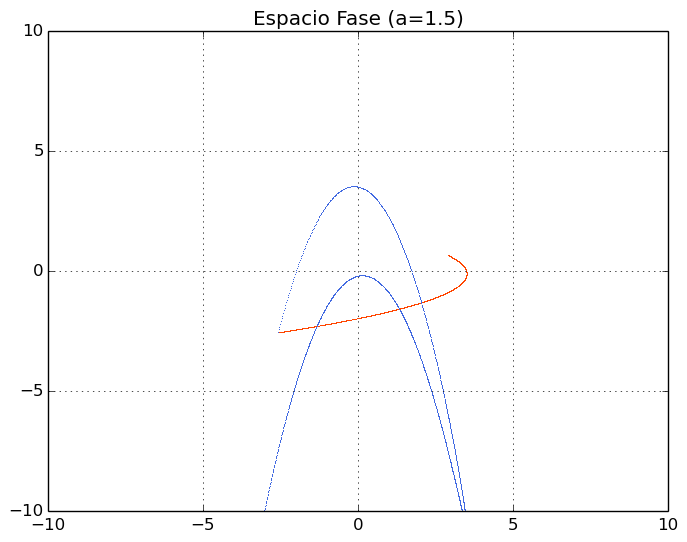

([-2.58114, -2.58114, -2.55666, -2.53225, -2.50789, -2.4836, -2.45937, -2.4352, -2.4111, -2.38705  …  -7.59154, -7.58643, -7.58133, -7.57623, -7.57112, -7.56601, -7.5609, -7.55578, -7.55067, -7.54555], [-2.58114, -2.58114, -2.46032, -2.34102, -2.22321, -2.10689, -1.99204, -1.87867, -1.76676, -1.6563  …  -59.0392, -58.9608, -58.8824, -58.8041, -58.7257, -58.6474, -58.5691, -58.4908, -58.4125, -58.3343])

In [16]:
#como ambas fuero calculadas con la función de hénon "normal" la aplicamos
w1_e=henon2(W_e[1],W_e[2]) #usamos ahora el mapeo inverso
w1_i=henon2(W_i[1],W_i[2])
evaluar([0.,100], 0.025, w1_e[1],w1_e[2],x_fijo,"orangered") #el valor del parámetro sigue siendo 100
evaluar([0.,100], 0.025, w1_i[1],w1_i[2],x_fijo,"royalblue")

Resulta que ahora la variedad inestable es la que crece y donde aparece el segundo tentáculo mientras que en la estable se queda "corta". Por lo que si iteramos ambas con el mapeo cambiado...

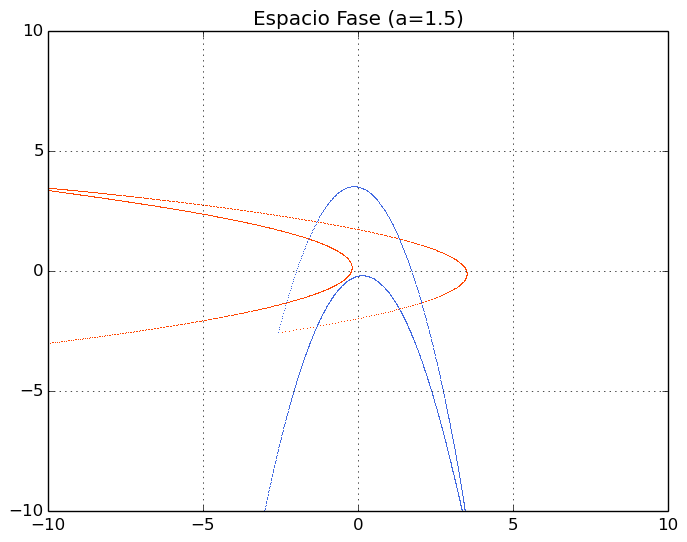

([-2.58114, -2.58114, -2.55666, -2.53225, -2.50789, -2.4836, -2.45937, -2.4352, -2.4111, -2.38705  …  -7.59154, -7.58643, -7.58133, -7.57623, -7.57112, -7.56601, -7.5609, -7.55578, -7.55067, -7.54555], [-2.58114, -2.58114, -2.46032, -2.34102, -2.22321, -2.10689, -1.99204, -1.87867, -1.76676, -1.6563  …  -59.0392, -58.9608, -58.8824, -58.8041, -58.7257, -58.6474, -58.5691, -58.4908, -58.4125, -58.3343])

In [17]:
W1_e=henon1(W_e[1],W_e[2]) 
W1_i=henon2(W_i[1],W_i[2])
evaluar([0.,100], 0.025, W1_e[1],W1_e[2],x_fijo,"orangered") #el valor del parámetro sigue siendo 100
evaluar([0.,100], 0.025, W1_i[1],W1_i[2],x_fijo,"royalblue")

También esto pasa si calculo la variedad estable con el mapeo inverso que no hemos usado mas que para iterar hasta ahora.
Si entonces calculamos de nuevo las variedades

In [18]:
Orden = 80
x_fijo = [punto1[1],punto1[2]] #punto fijo
tiempo = [0.,3.] #tiempo de evaluación
delta_t = tiempo[2]/1000 #paso del tiempo de evaluación
w_e, f_e, vec_e, val_e = Inestable(henon2,Orden,punto1,tiempo, delta_t) # variedad  estable
w_i, f_i, vec_i, val_i = Inestable(henon1, Orden ,punto1, tiempo, delta_t) #variedad inestable

(TaylorSeries.Taylor1{Float64}[ - 2.58113883008419 + 0.19760964962804103 t - 0.002003895331025971 t² + 6.773617424159542e-6 t³ - 1.1146699320514831e-8 t⁴ + 1.052133282947602e-11 t⁵ - 6.3578386428285675e-15 t⁶ + 2.6472556409456974e-18 t⁷ - 7.998263760414952e-22 t⁸ + 1.8228540060561865e-25 t⁹ - 3.230947112568956e-29 t¹⁰ + 4.5653566822533906e-33 t¹¹ - 5.248531627852885e-37 t¹² + 4.993530928467195e-41 t¹³ - 3.988690026014807e-45 t¹⁴ + 2.7080200253516064e-49 t¹⁵ - 1.579446229638945e-53 t¹⁶ + 7.98795329821606e-58 t¹⁷ - 3.53204348655944e-62 t¹⁸ + 1.3759681764841008e-66 t¹⁹ - 4.747309834991615e-71 t²⁰ + 1.4588016135104067e-75 t²¹ - 3.9209475707167595e-80 t²² + 1.1965782381337765e-84 t²³ - 4.868889315322984e-89 t²⁴ + 1.6496438666451998e-109 t²⁹ + 𝒪(t¹⁸¹),  - 2.58113883008419 + 0.9802807895566875 t - 0.04931280661846019 t² + 0.000826889915112779 t³ - 6.750184779658301e-6 t⁴ + 3.160694189440592e-8 t⁵ - 9.47465847482022e-11 t⁶ + 1.9570065931097607e-13 t⁷ - 2.933151342867866e-16 t⁸ + 3.316140944900

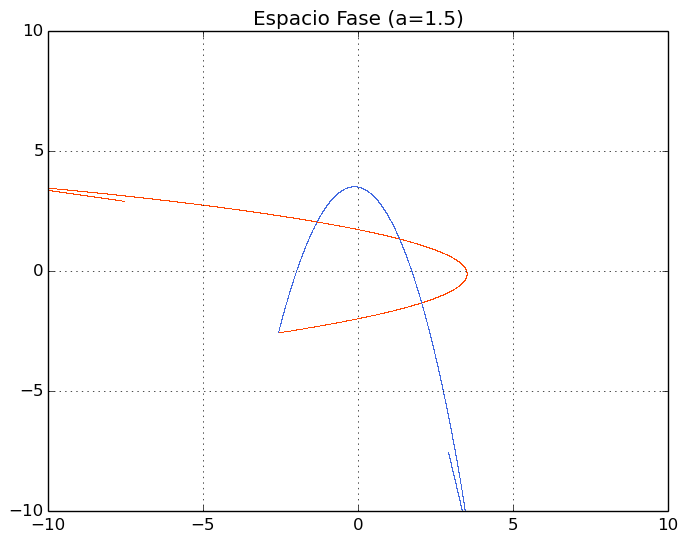

([-2.58114, -2.58114, -2.5762, -2.57126, -2.56633, -2.5614, -2.55647, -2.55154, -2.54662, -2.5417  …  2.90783, 2.90684, 2.90585, 2.90487, 2.90388, 2.90289, 2.9019, 2.90091, 2.89992, 2.89893], [-2.58114, -2.58114, -2.55666, -2.53225, -2.50789, -2.4836, -2.45937, -2.4352, -2.4111, -2.38705  …  -7.59154, -7.58643, -7.58133, -7.57623, -7.57112, -7.56601, -7.5609, -7.55578, -7.55067, -7.54555])

In [19]:
evaluar([0.,-100], -0.025, w_e[1],w_e[2],x_fijo,"orangered") # como calculamos con la inversa debemos recorrer el 
# parámetro en sentido contrario
evaluar([0.,100], 0.025, w_i[1],w_i[2],x_fijo,"royalblue")

Como sabemos el error disminuye en la variedad estable calculada de esta forma

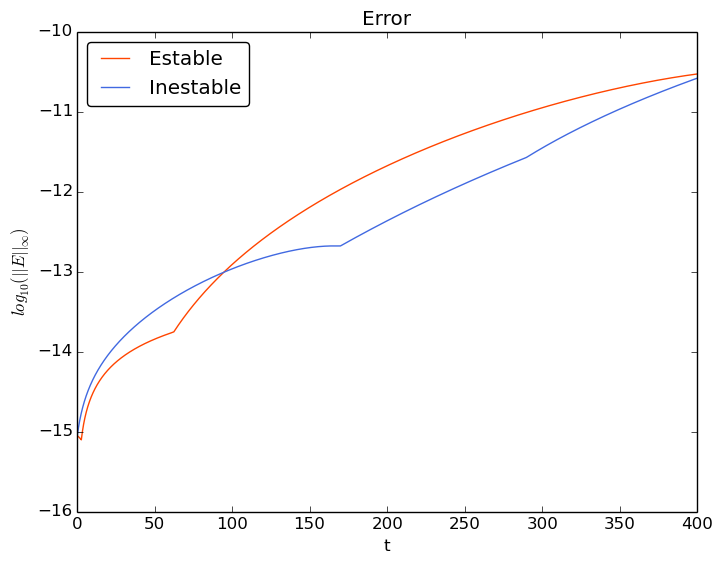

PyObject <matplotlib.legend.Legend object at 0x7fc64ee99910>

In [20]:
tiem = [0.,400.]
ErrorEstable = CalculoError(henon2, w_e,f_e,tiem,0.025 );
ErrorInestable = CalculoError(henon1, w_i,f_i,tiem,0.025 );
plot(ErrorEstable[1],log10.(ErrorEstable[2]),marker= "None", label="Estable",color="orangered")
plot(ErrorInestable[1],log10.(ErrorInestable[2]),marker= "None", label="Inestable",color="royalblue")

xlabel("t")
ylabel(L"$log_{10}(|| E||_{\infty})$")
title("Error")
legend(loc="low right",fancybox="true" )

hacemos lo mismo que en el caso pasado donde iteramos las variedades 

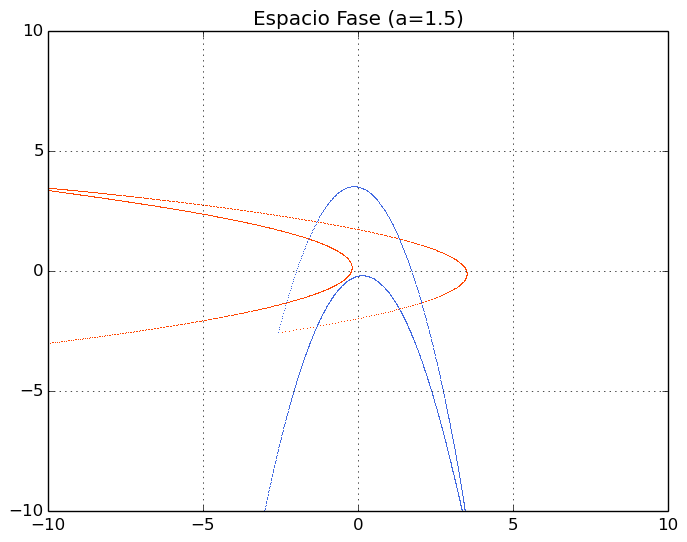

([-2.58114, -2.58114, -2.55666, -2.53225, -2.50789, -2.4836, -2.45937, -2.4352, -2.4111, -2.38705  …  -7.59154, -7.58643, -7.58133, -7.57623, -7.57112, -7.56601, -7.5609, -7.55578, -7.55067, -7.54555], [-2.58114, -2.58114, -2.46032, -2.34102, -2.22321, -2.10689, -1.99204, -1.87867, -1.76676, -1.6563  …  -59.0392, -58.9608, -58.8824, -58.8041, -58.7257, -58.6474, -58.5691, -58.4908, -58.4125, -58.3343])

In [21]:
w1e=henon1(w_e[1],w_e[2]) 
w1i=henon2(w_i[1],w_i[2])
evaluar([0.,-100], -0.025, w1e[1],w1e[2],x_fijo,"orangered") #el valor del parámetro sigue siendo 100
evaluar([0.,100], 0.025, w1i[1],w1i[2],x_fijo,"royalblue")

Iterando también los puntos resulta :

In [22]:
t1=-1.36597 #este valor viene de cuando calculé las intersecciones entre variedades, está en el notebook de
# intersecciones. Es el asociado a la variedad estable
P1_e=[w_e[1](t1),w_e[2](t1)] # el primer punto es el asociado a la variedad estable evaluada en t1 que representa e
#el primer corte
P2_e=henon1(P1_e[1],P1_e[2]) # el segundo punto sería iterar el primero con el mapeo no inverso
P3_e=henon1(P2_e[1],P2_e[2])
P4_e=henon1(P3_e[1],P3_e[2])
P5_e=henon1(P4_e[1],P4_e[2])
P6_e=henon1(P5_e[1],P5_e[2])
P7_e=henon1(P6_e[1],P6_e[2])
P8_e=henon1(P7_e[1],P7_e[2])
P9_e=henon1(P8_e[1],P8_e[2])



2-element Array{Float64,1}:
 -3.0993 
 -2.68306

Los vemos en el espacio fase y sobre las gráficas

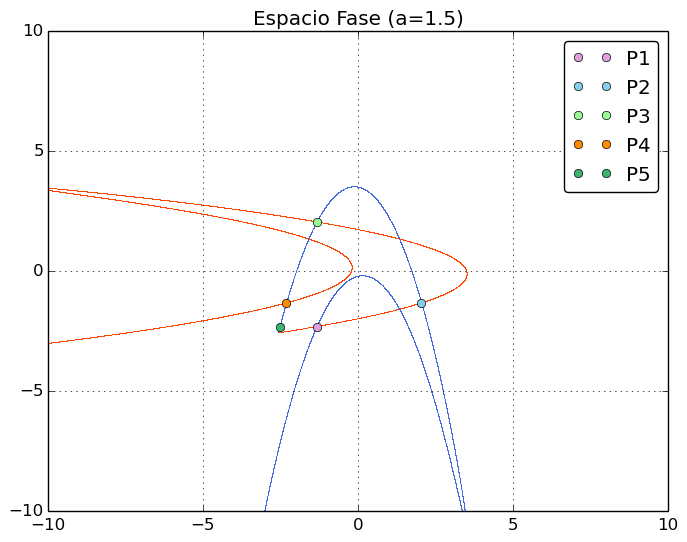

PyObject <matplotlib.legend.Legend object at 0x7fc64f1b6dd0>

In [23]:
evaluar([0.,-200], -0.025, w_e[1],w_e[2],x_fijo,"orangered")
evaluar([0.,200], 0.025, w_i[1],w_i[2],x_fijo,"royalblue")
plot([P1_e[1]],[P1_e[2]],"o",color="plum",label="P1")
plot([P2_e[1]],[P2_e[2]],"o",color="skyblue",label="P2")
plot([P3_e[1]],[P3_e[2]],"o",color="palegreen",label="P3")
plot([P4_e[1]],[P4_e[2]],"o",color="darkorange",label="P4")
plot([P5_e[1]],[P5_e[2]],"o",color="mediumseagreen",label="P5")

legend(loc="low right",fancybox="true" )


Si iteramos de nuevo los polinomios

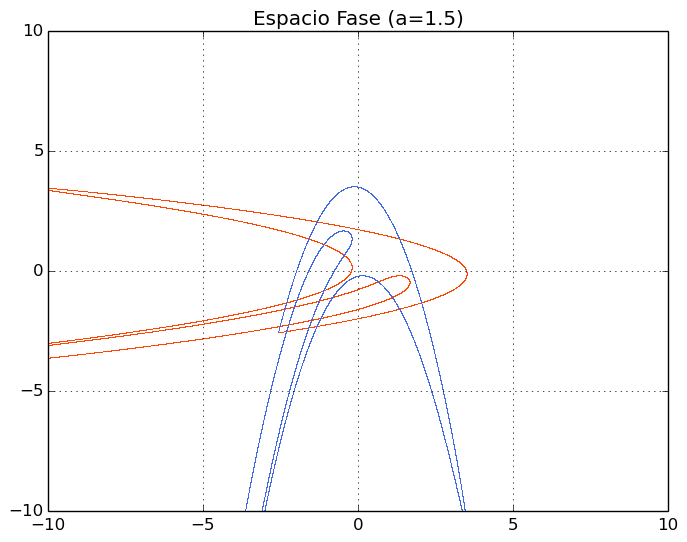

([-2.58114, -2.58114, -2.57628, -2.57142, -2.56656, -2.56171, -2.55685, -2.55201, -2.54716, -2.54231  …  -58.3624, -58.3593, -58.3562, -58.3531, -58.3499, -58.3468, -58.3437, -58.3405, -58.3374, -58.3343], [-2.58114, -2.58114, -2.55705, -2.53301, -2.50904, -2.48512, -2.46127, -2.43747, -2.41374, -2.39006  …  -3397.13, -3396.76, -3396.4, -3396.03, -3395.67, -3395.3, -3394.94, -3394.57, -3394.21, -3393.84])

In [24]:
w2_e=henon1(w1e[1],w1e[2])
w2_i=henon2(w1i[1],w1i[2])
delta = 100/100000
evaluar([0.,-100], -delta, w2_e[1],w2_e[2],x_fijo,"orangered") #el valor del parámetro sigue siendo 100
evaluar([0.,100], delta, w2_i[1],w2_i[2],x_fijo,"royalblue")

Junto con los puntos

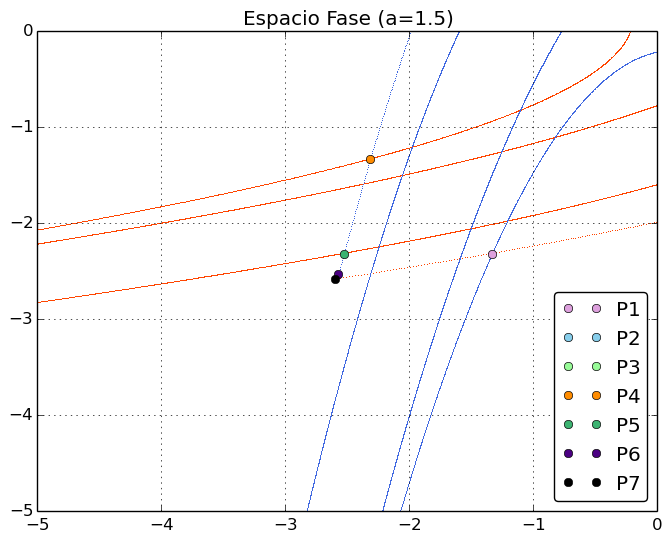

PyObject <matplotlib.legend.Legend object at 0x7fc64eb4ca10>

In [25]:

evaluar([0.,-100], -delta, w2_e[1],w2_e[2],x_fijo,"orangered") #el valor del parámetro sigue siendo 100
evaluar([0.,100], delta, w2_i[1],w2_i[2],x_fijo,"royalblue")
plot([P1_e[1]],[P1_e[2]],"o",color="plum",label="P1")
plot([P2_e[1]],[P2_e[2]],"o",color="skyblue",label="P2")
plot([P3_e[1]],[P3_e[2]],"o",color="palegreen",label="P3")
plot([P4_e[1]],[P4_e[2]],"o",color="darkorange",label="P4")
plot([P5_e[1]],[P5_e[2]],"o",color="mediumseagreen",label="P5")
plot([P6_e[1]],[P6_e[2]],"o",color="indigo",label="P6")
plot([P7_e[1]],[P7_e[2]],"o",color="k",label="P7")



xlim(-5,0)
ylim(-5,0)
legend(loc="low right",fancybox="true" )

Ahora si usamos BigFloat para llegar más lejos

In [26]:
a=parse(BigFloat,"1.5")
uno = parse(BigFloat,"1.")
henon3(x,y)=Henon(x,y,a,uno)
henon4(x,y)=HenonI(x,y,a,uno)
punto2 = parametro(a)

2-element Array{BigFloat,1}:
 -2.581138830084189665999446772216359266859777569662608413428752426396297219319615
 -2.581138830084189665999446772216359266859777569662608413428752426396297219319615

In [27]:
Orden = 80
x_fijo = [punto2[1],punto2[2]]
tiempo = [big(0.),big(3.)]
delta_t = big(tiempo[2]/1000)
W_eB, f_eB, vec_eB, val_eB = Inestable(henon4,80,punto2,tiempo, delta_t)
W_iB, f_iB, vec_iB, val_iB = Inestable(henon3, 80 ,punto2, tiempo, delta_t)

(TaylorSeries.Taylor1{BigFloat}[ - 2.581138830084189665999446772216359266859777569662608413428752426396297219319615 + 1.976096496280411299893517888473283564268459937931934769519718064126592279387433e-01 t - 2.003895331025972196342622826021202503295145606791121461644344458822853575775757e-03 t² + 6.773617424159552153953923390837421197183529244210541087841269515123780312752925e-06 t³ - 1.11466993205147455157327998961640353180987613125678166035321200632683025090382e-08 t⁴ + 1.052133282947635853285857814433379452760584357967862732891384175316328496909155e-11 t⁵ - 6.357838642827248153524793571725232426451796352736420739421144748094079986624664e-15 t⁶ + 2.647255640946963122270053111557294719608588652246241179109925113078753619570912e-18 t⁷ - 7.998263760368929876568370460832463675045213388880502623760589498704957638051457e-22 t⁸ + 1.822854006043945421375534052614212331695279878558791323880740222662535284988522e-25 t⁹ - 3.230947113742378049636580195960056232395326636193016581306484357213698546

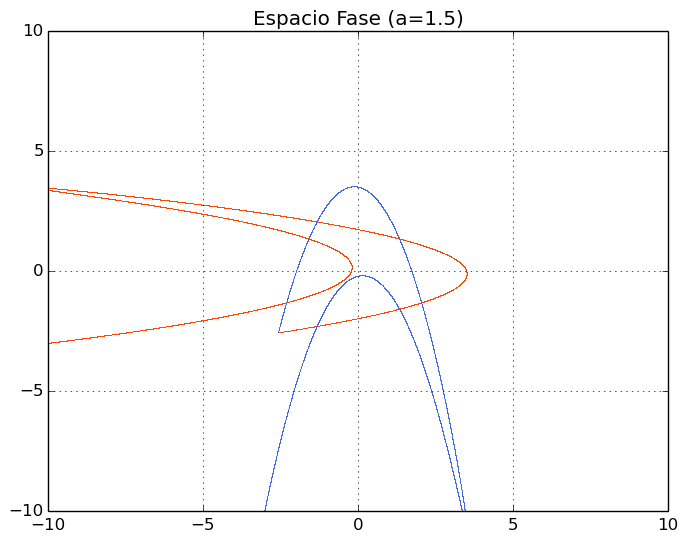

([-2.58114, -2.58114, -2.5762, -2.57126, -2.56633, -2.5614, -2.55647, -2.55154, -2.54662, -2.5417  …  -3.85026, -3.85213, -3.854, -3.85587, -3.85774, -3.85961, -3.86147, -3.86334, -3.86521, -3.86708], [-2.58114, -2.58114, -2.55666, -2.53225, -2.50789, -2.4836, -2.45937, -2.4352, -2.4111, -2.38705  …  -15.8653, -15.8801, -15.8948, -15.9096, -15.9243, -15.9391, -15.9538, -15.9686, -15.9834, -15.9982])

In [28]:
figure(7)
evaluar([0.,-big(200.)], -big(0.025), W_eB[1],W_eB[2],x_fijo,"orangered")
evaluar([0.,big(200.)], big(0.025), W_iB[1],W_iB[2],x_fijo,"royalblue")

In [29]:
W1_eB=henon3(W_eB[1],W_eB[2])
W1_iB=henon4(W_iB[1],W_iB[2])

2-element Array{TaylorSeries.Taylor1{BigFloat},1}:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

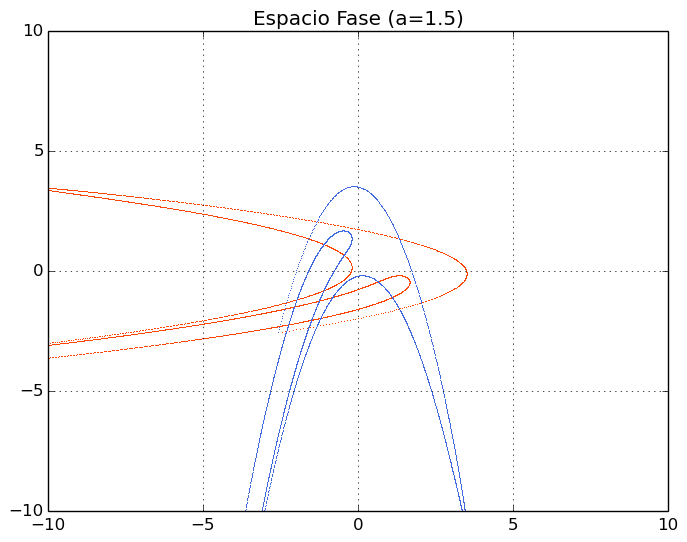

([-2.58114, -2.58114, -2.55666, -2.53225, -2.50789, -2.4836, -2.45937, -2.4352, -2.4111, -2.38705  …  -15.8653, -15.8801, -15.8948, -15.9096, -15.9243, -15.9391, -15.9538, -15.9686, -15.9834, -15.9982], [-2.58114, -2.58114, -2.46032, -2.34102, -2.22321, -2.10689, -1.99204, -1.87867, -1.76676, -1.6563  …  -246.358, -246.824, -247.291, -247.758, -248.226, -248.694, -249.163, -249.633, -250.103, -250.574])

In [30]:
figure(8)
evaluar([0.,-big(200.)], -big(0.025), W1_eB[1],W1_eB[2],x_fijo,"orangered")
evaluar([0.,big(200.)], big(0.025), W1_iB[1],W1_iB[2],x_fijo,"royalblue")

Con un parámetro diferente para poder observar mejor

In [31]:
b=parse(BigFloat,"6.5")
uno = parse(BigFloat,"1.")
henon5(x,y)=Henon(x,y,b,uno)
henon6(x,y)=HenonI(x,y,b,uno)
punto3 = parametro(b)

2-element Array{BigFloat,1}:
 -3.738612787525830567284848914004010669763723474989916271134472248662466385613599
 -3.738612787525830567284848914004010669763723474989916271134472248662466385613599

In [32]:
Orden = 80
x_fijo = [punto3[1],punto3[2]]
tiempo = [big(0.),big(3.)]
delta_t = big(tiempo[2]/1000)
WeB, feB, veceB, valeB = Inestable(henon6,80,punto3,tiempo, delta_t)
WiB, fiB, veciB, valiB = Inestable(henon5, 80 ,punto3, tiempo, delta_t)

(TaylorSeries.Taylor1{BigFloat}[ - 3.738612787525830567284848914004010669763723474989916271134472248662466385613599 + 1.349745895320868343244395630874548137937707343579803914045013496316834721909717e-01 t - 3.923644611672057779631016898473830135083008542917288561154824126391027632259466e-04 t² + 2.728910843490695084562114682663454274050735317814259997008059638359561191635812e-07 t³ - 7.85780999815163840995996336384453830412588861014878569989515321489595872607727e-11 t⁴ + 1.104340944550915029731083557276316369748632617335301680612593413838333529221457e-14 t⁵ - 8.889067535400140522287058989077631146199687493073241010675363371377915007271759e-19 t⁶ + 4.507978839517103906487058313416717692293615341051414253678794557030322126952734e-23 t⁷ - 1.530855968839874958459564946785084768714519559160989039383409201393915348541894e-27 t⁸ + 3.644448795996392901718666371865793436475224658188963088143238760466974548139488e-32 t⁹ - 6.324644880881850454670246713403620124299227213193025375068308257830707563

Conjunto fundamental

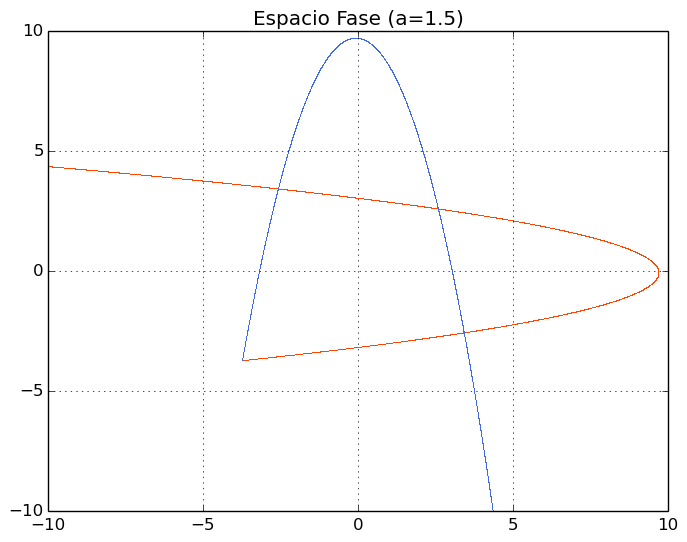

([-3.73861, -3.73861, -3.73524, -3.73187, -3.72849, -3.72512, -3.72175, -3.71838, -3.715, -3.71163  …  9.62051, 9.62072, 9.62093, 9.62114, 9.62135, 9.62156, 9.62177, 9.62198, 9.62219, 9.6224], [-3.73861, -3.73861, -3.71385, -3.68912, -3.66442, -3.63974, -3.61509, -3.59046, -3.56586, -3.54129  …  -85.7031, -85.7076, -85.7121, -85.7165, -85.721, -85.7254, -85.7298, -85.7343, -85.7387, -85.7431])

In [33]:

evaluar([0.,-big(200.)], -big(0.025), WeB[1],WeB[2],x_fijo,"orangered")
evaluar([0.,big(200.)], big(0.025), WiB[1],WiB[2],x_fijo,"royalblue")

Primera iteración

In [34]:
W1eB=henon5(WeB[1],WeB[2])
W1iB=henon6(WiB[1],WiB[2])

2-element Array{TaylorSeries.Taylor1{BigFloat},1}:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

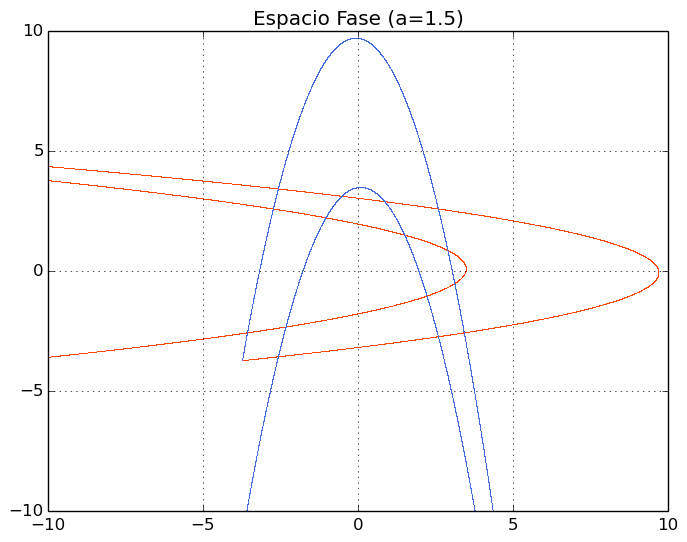

([-3.73861, -3.73861, -3.73614, -3.73366, -3.73118, -3.72871, -3.72623, -3.72375, -3.72128, -3.7188  …  -85.7431, -85.7435, -85.744, -85.7444, -85.7448, -85.7453, -85.7457, -85.7462, -85.7466, -85.7471], [-3.73861, -3.73861, -3.72044, -3.70227, -3.68412, -3.66599, -3.64787, -3.62976, -3.61167, -3.59359  …  -7355.0, -7355.07, -7355.15, -7355.23, -7355.3, -7355.38, -7355.45, -7355.53, -7355.6, -7355.68])

In [35]:
evaluar([0.,-big(200.)], -big(0.0025), W1eB[1],W1eB[2],x_fijo,"orangered")
evaluar([0.,big(200.)], big(0.0025), W1iB[1],W1iB[2],x_fijo,"royalblue")

Segunda iteración

In [36]:
W2eB=henon5(W1eB[1],W1eB[2])
W2iB=henon6(W1iB[1],W1iB[2])

2-element Array{TaylorSeries.Taylor1{BigFloat},1}:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

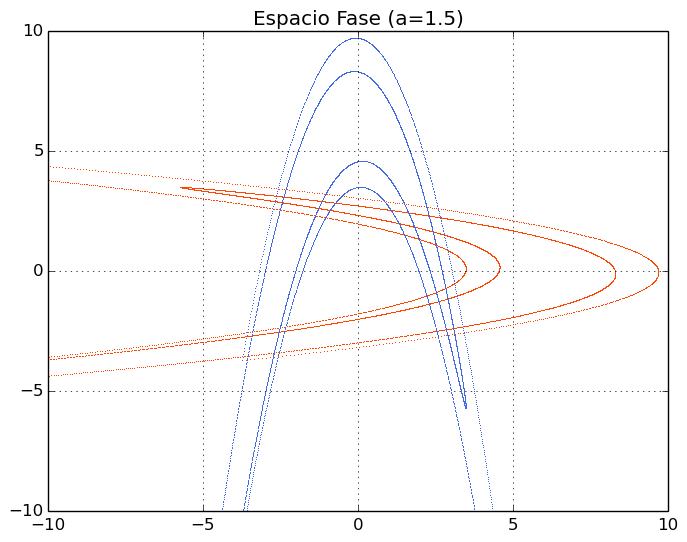

([-3.73861, -3.73861, -3.72044, -3.70227, -3.68412, -3.66599, -3.64787, -3.62976, -3.61167, -3.59359  …  -7355.0, -7355.07, -7355.15, -7355.23, -7355.3, -7355.38, -7355.45, -7355.53, -7355.6, -7355.68], [-3.73861, -3.73861, -3.6055, -3.47316, -3.34158, -3.21076, -3.08071, -2.95141, -2.82288, -2.6951  …  -5.40959e7, -5.4097e7, -5.40981e7, -5.40993e7, -5.41004e7, -5.41015e7, -5.41026e7, -5.41037e7, -5.41048e7, -5.41059e7])

In [37]:
evaluar([0.,-big(200.)], -big(0.0025), W2eB[1],W2eB[2],x_fijo,"orangered")
evaluar([0.,big(200.)], big(0.0025), W2iB[1],W2iB[2],x_fijo,"royalblue")

Tercera iteración

In [38]:
W3eB=henon5(W2eB[1],W2eB[2])
W3iB=henon6(W2iB[1],W2iB[2])

2-element Array{TaylorSeries.Taylor1{BigFloat},1}:
  - 3.738612787525830567284848914004010669763723474989916271134472248662466385612494 + 5.339719879019797811606856560130797639685465922525880577564502672437603452280471e+01 t - 6.140766476122564037861769183294093601001017646227055137298669703352070359419204e+01 t² + 1.689618766424976027991813850741110627403147127237210043338263269927461832490392e+01 t³ - 1.924719117679400733116178463488634380843367982639166842491378055108885850981195 t⁴ + 1.070127365934443703543832365576039660638078504116173046639247862554780604495532e-01 t⁵ - 3.407649834250746504952671642228900271732383420689018184591532644612764152086927e-03 t⁶ + 6.83670881387621852774414087017097729366821327493739480005820207183619324397915e-05 t⁷ - 9.184721777599512390136339052791091281871717247960151382868421096751542288775476e-07 t⁸ + 8.650276416099533342387331408269609148293789712244980713768197999800070746174396e-09 t⁹ - 5.93882786122083669020668833672247112411459708730959066612

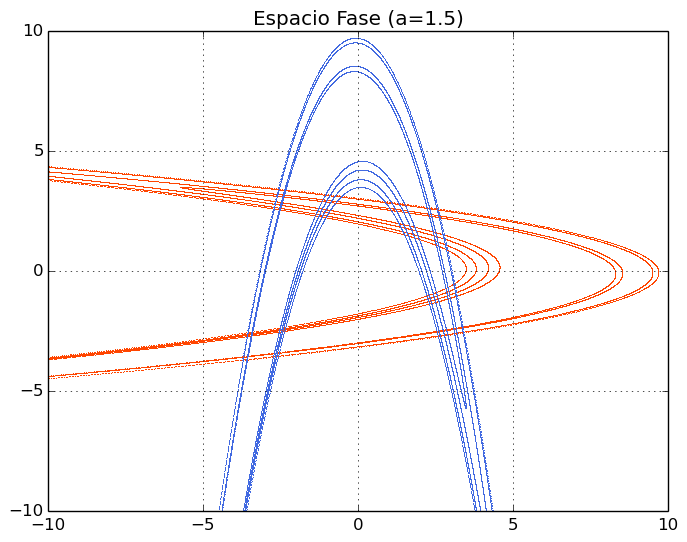

([-3.73861, -3.73861, -3.72527, -3.71193, -3.6986, -3.68528, -3.67196, -3.65866, -3.64536, -3.63206  …  -5.41059e7, -5.4106e7, -5.41062e7, -5.41063e7, -5.41064e7, -5.41065e7, -5.41066e7, -5.41067e7, -5.41068e7, -5.41069e7], [-3.73861, -3.73861, -3.64082, -3.54344, -3.44648, -3.34993, -3.25378, -3.15805, -3.06273, -2.96782  …  -2.92745e15, -2.92746e15, -2.92748e15, -2.92749e15, -2.9275e15, -2.92751e15, -2.92752e15, -2.92754e15, -2.92755e15, -2.92756e15])

In [39]:
evaluar([0.,-big(200.)], -big(0.00025), W3eB[1],W3eB[2],x_fijo,"orangered")
evaluar([0.,big(200.)], big(0.00025), W3iB[1],W3iB[2],x_fijo,"royalblue")

Cuarta iteración

In [40]:
W4eB=henon5(W3eB[1],W3eB[2])
W4iB=henon6(W3iB[1],W3iB[2])

2-element Array{TaylorSeries.Taylor1{BigFloat},1}:
  - 3.738612787525830567284848914004010669763723474989916271134472248662466385605447 + 3.919890730854674704073053271366222934335881015493679455005897236949942139497188e+02 t - 3.30928030723385586447807105593943523516766931054872508094953687768788525046389e+03 t² + 6.684288462236498558231203703345491479701639467672629496798999673265376524079599e+03 t³ - 5.589710370704042542881657974552033570090212995947179975594171118828758185752026e+03 t⁴ + 2.281460227693494307648699989573793058332381246413026911065648466453101246060037e+03 t⁵ - 5.333200107441478322093956148924805307088377935611298815816489771201372123355155e+02 t⁶ + 7.854806444167805945010436706851796143652495207729425854783308872505708668660489e+01 t⁷ - 7.746577968762383700848075293434279816469560235762957593434747052231381406042666 t⁸ + 5.355861809215238296486078704569623377403270756652733704681504444073688770072473e-01 t⁹ - 2.69932763686855819128776459190471914521827908162832906297

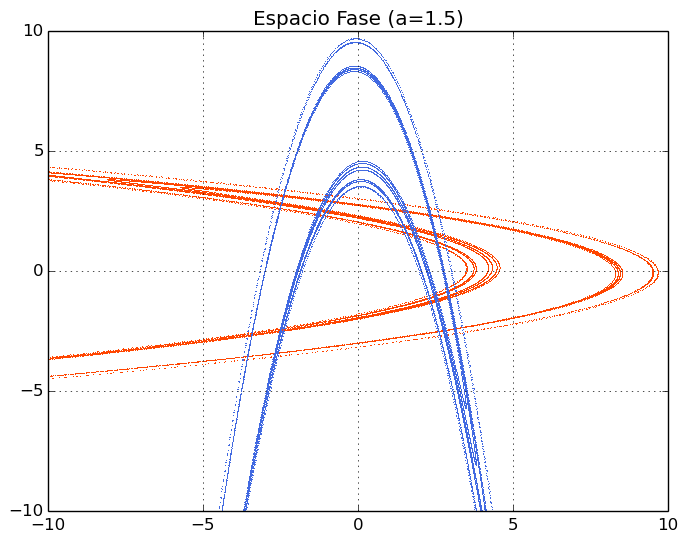

([-3.73861, -3.73861, -3.64082, -3.54344, -3.44648, -3.34993, -3.25378, -3.15805, -3.06273, -2.96782  …  -2.92745e15, -2.92746e15, -2.92748e15, -2.92749e15, -2.9275e15, -2.92751e15, -2.92752e15, -2.92754e15, -2.92755e15, -2.92756e15], [-3.73861, -3.73861, -3.03032, -2.34407, -1.67962, -1.03673, -0.415149, 0.185359, 0.765036, 1.32412  …  -8.56997e30, -8.57004e30, -8.57011e30, -8.57018e30, -8.57026e30, -8.57033e30, -8.5704e30, -8.57047e30, -8.57054e30, -8.57061e30])

In [41]:
evaluar([0.,-big(200.)], -big(0.00025), W4eB[1],W4eB[2],x_fijo,"orangered")
evaluar([0.,big(200.)], big(0.00025), W4iB[1],W4iB[2],x_fijo,"royalblue")

In [ ]:
      dyñ55-ñ